In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
github_dir = '/home/qzeng_salk_edu/project/241207_zhwu_ml/aging-gene-prediction/'

In [4]:
ct = 'Oligo_NN'

In [9]:
result = pd.read_csv(f"{github_dir}/ml_output/{ct}/result.csv", index_col =0)
result.head()

,gene,DEG,pred,dmr,mcg_genebody,mch_genebody,atac,hic_loop,hic_abc_dmr,hic_abc_peak
cell_type,,,,,,,,,,
Oligo_NN,Xpnpep3,0,0,0.135131,0.270288,0.139014,0.100738,0.073040,0.143185,0.138603
Oligo_NN,Cramp1l,0,-1,0.083843,0.103879,0.086253,0.369499,0.182679,0.080250,0.093597
Oligo_NN,Pafah2,0,0,0.109253,0.213768,0.099665,0.102753,0.144581,0.162148,0.167832
Oligo_NN,Git2,0,-1,0.076911,0.102443,0.079121,0.323988,0.148375,0.134192,0.134971
Oligo_NN,2700046G09Rik,0,-1,0.089679,0.135916,0.092256,0.054978,0.048473,0.242827,0.335871


In [12]:
deg_df = pd.read_csv(f"{github_dir}/ml_input/{ct}/{ct}.RNA_DEG.csv", index_col =0)
deg_df.head()

,stats,fdr,log2(old/young),DEG,-log10(fdr)
gene,,,,,
Xkr4,43.672122,2.106014e-09,0.054779,0,8.676539
Gm1992,9.656087,1.843535e-02,-0.461790,0,1.734349
Mrpl15,1.435565,5.860782e-01,0.021702,0,0.232044
Lypla1,11.053947,9.864865e-03,0.114144,0,2.005909
Tcea1,3.623364,2.464893e-01,0.060346,0,0.608202


In [62]:
# for tmp_result, if pred == DEG then correct predicted, otherwise false
correct_pred = tmp_result[tmp_result['pred'] == tmp_result['DEG']]['gene'].values
false_pred = tmp_result[tmp_result['pred'] != tmp_result['DEG']]['gene'].values

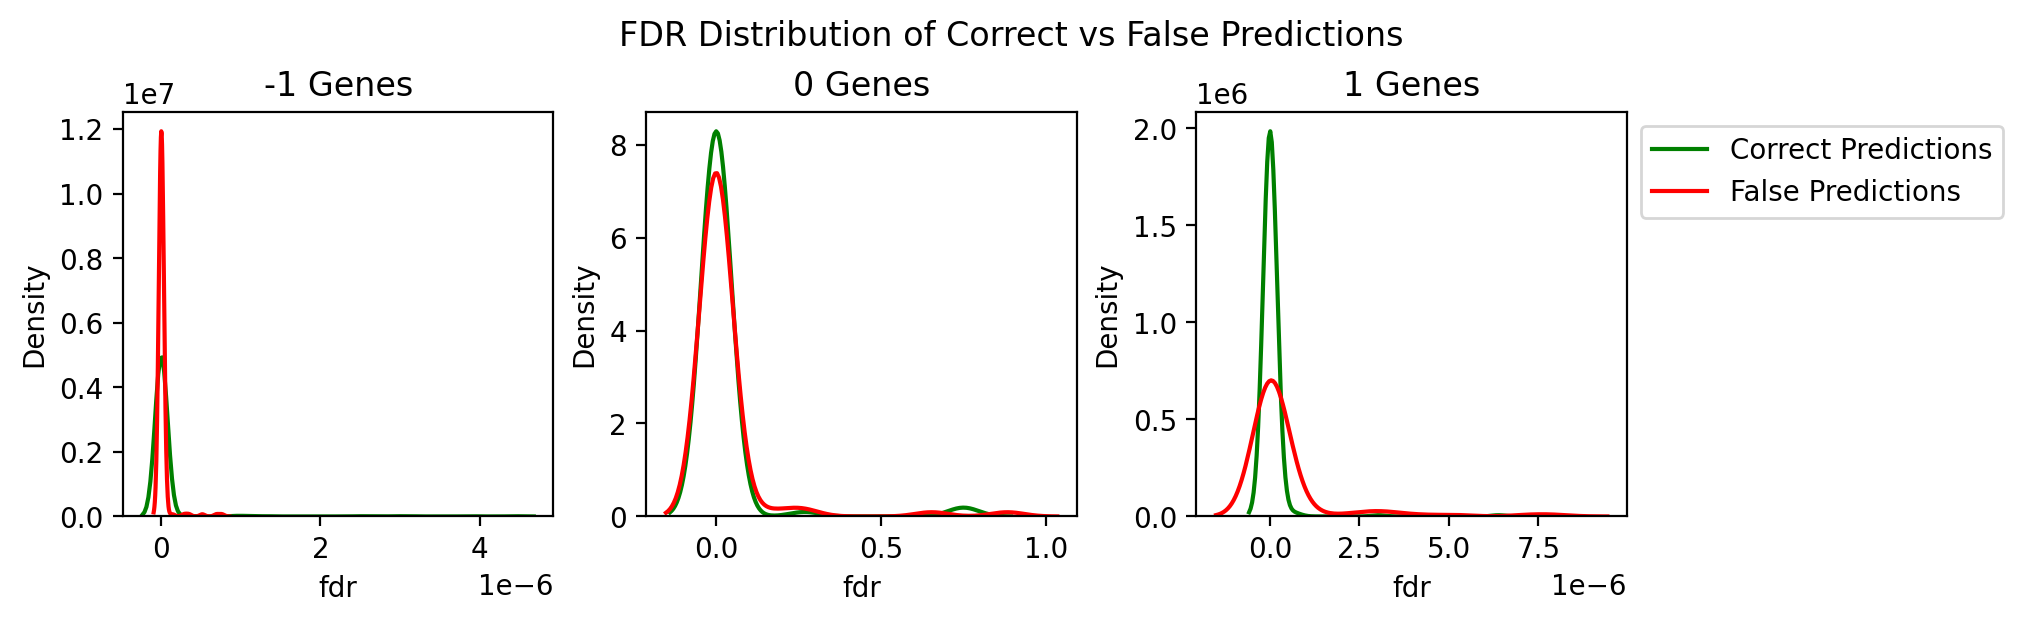

In [76]:
# remove all warnings
import warnings
warnings.filterwarnings("ignore")
all_gene_cats = [-1,0,1]

fig, axes = plt.subplots(figsize=(10, 3), ncols = 3, nrows = 1, dpi = 200, constrained_layout=True)

for gene_cat, ax in zip(all_gene_cats, axes.ravel()):
    tmp_deg_df = deg_df[deg_df['DEG'] == gene_cat]
    tmp_result = result[result['DEG'] == gene_cat]


    sns.distplot(tmp_deg_df.loc[tmp_deg_df.index.isin(correct_pred), 'fdr'], ax= ax, label='Correct Predictions', color='green', hist=False)
    sns.distplot(tmp_deg_df.loc[tmp_deg_df.index.isin(false_pred), 'fdr'],ax = ax, label='False Predictions', color='red', hist=False)
# add title, and legend
    ax.set_title(f'{gene_cat} Genes')
    if gene_cat == 1:
        ax.legend()
        # place legend outside the plot
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('FDR Distribution of Correct vs False Predictions')
plt.show()

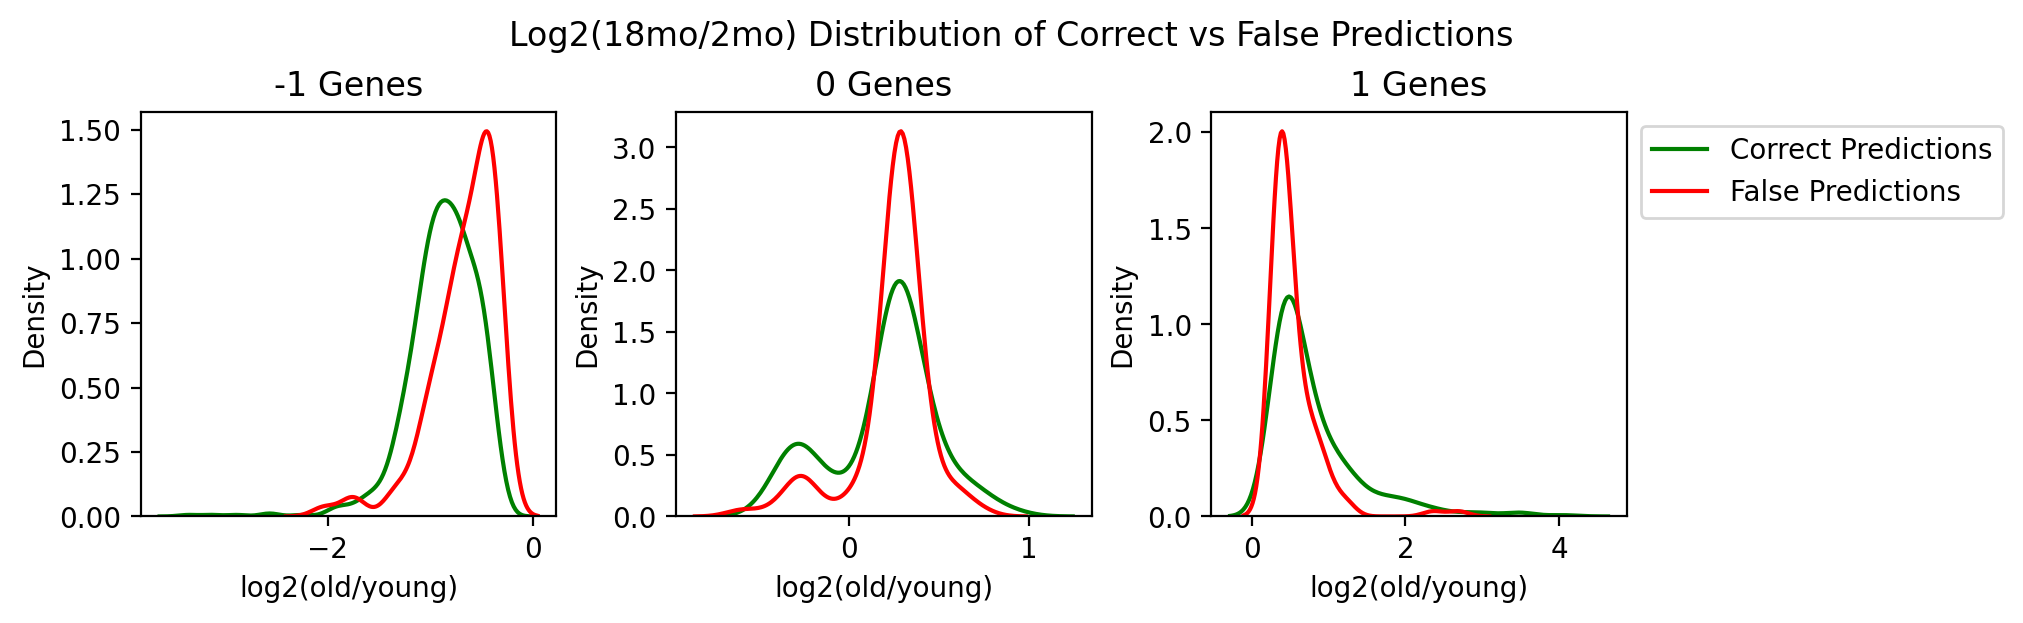

In [77]:
# remove all warnings
import warnings
warnings.filterwarnings("ignore")
all_gene_cats = [-1,0,1]

fig, axes = plt.subplots(figsize=(10, 3), ncols = 3, nrows = 1, dpi = 200, constrained_layout=True)

for gene_cat, ax in zip(all_gene_cats, axes.ravel()):
    tmp_deg_df = deg_df[deg_df['DEG'] == gene_cat]
    tmp_result = result[result['DEG'] == gene_cat]

    sns.distplot(tmp_deg_df.loc[tmp_deg_df.index.isin(correct_pred), 'log2(old/young)'], ax = ax, label='Correct Predictions', color='green', hist=False)
    sns.distplot(tmp_deg_df.loc[tmp_deg_df.index.isin(false_pred), 'log2(old/young)'], ax = ax,label='False Predictions', color='red', hist=False)  
    ax.set_title(f'{gene_cat} Genes')
    # only show legend for the last subplot
    if gene_cat == 1:
        ax.legend()
        # place legend outside the plot
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle('Log2(18mo/2mo) Distribution of Correct vs False Predictions')
plt.show()

In [ ]:

ax.set_title('FDR Distribution')
ax.legend()